In [1]:
import os
import sys

# Add the root directory to the system path
sys.path.append(os.path.abspath(".."))

In [2]:
from portfolio_optimization import optimization_model as om
from portfolio_optimization import optimization_inputs as oi
from portfolio_optimization import optimization_data as od
from portfolio_optimization import benchmark_model as bm
from portfolio_optimization import performance as perf

In [3]:
import pandas as pd
%matplotlib inline

In [4]:
pd.set_option('display.precision', 4)

In [5]:
risk_free_rate = oi.RISK_FREE_RATE
print('Risk-free Rate: {}%'.format(risk_free_rate*100))

Risk-free Rate: 2.27%


In [6]:
print('Median Fund Expense Fee%: {}%'.format(
    pd.read_csv('../data/factor_data.csv', index_col=0
               )['Fund Expense Fee%'].sort_values(ascending=False).median()))

Median Fund Expense Fee%: 0.91%


In [7]:
print('Variable insurance charges: {}%'.format(od.get_variable_insurance_charges()*100))

Variable insurance charges: 2.55%


In [8]:
(om.FUND_EXPENSE_PERCENT + om.VARIABLE_INSURANCE_CHARGES).sort_values()

Subaccount Name
JNL_Mellon_S&P_500_Index                          0.0307
JNL_Mellon_Bond_Index                             0.0311
JNL_WMC_Government_Money_Market                   0.0311
JNL_Mellon_Small_Cap_Index                        0.0311
JNL_Mellon_S&P_400_MidCap_Index                   0.0311
                                                   ...  
JNL_American_Funds_Global_Small_Capitalization    0.0380
JNL_American_Funds_New_World                      0.0381
JNL_GQG_Emerging_Markets_Equity                   0.0392
JNL_Westchester_Capital_Event_Driven              0.0414
JNL_Multi_Manager_Alternative                     0.0474
Name: Fund Expense Fee%, Length: 115, dtype: float64

In [9]:
subaccount_prices = od.get_subaccount_prices()
subaccount_returns = od.get_subaccount_returns()
market_portfolio_prices, market_portfolio_returns = bm.get_market_portfolio_prices_and_returns()

In [10]:
od.compute_top_ranked_subaccounts(min_rank=0.70).sort_values(by='Rank', ascending=False)

,Morningstar Category,Expense,Tenure,Turnover,Average,Rank
Subaccount Name,,,,,,
JNL_JPMorgan_US_Government_&_Quality_Bond,Intermediate Government,0.8954,2.4138,0.6412,1.3168,1.0000
JNL_T_Rowe_Price_Mid_Cap_Growth,Mid-Cap Growth,-0.3452,3.0000,0.5652,1.0733,0.9913
JNL_WMC_Government_Money_Market,Money Market-Taxable,1.4944,-0.0739,0.9814,0.8006,0.9826
JNL_Mellon_Bond_Index,Intermediate Core Bond,1.4944,1.0874,-0.3324,0.7498,0.9739
JNL_T_Rowe_Price_Established_Growth,Large Growth,0.3393,1.2348,0.3987,0.6576,0.9652
JNL_Mellon_S&P_500_Index,Large Blend,1.6655,-0.6074,0.9054,0.6545,0.9565
JNL_Invesco_Small_Cap_Growth,Small Growth,-0.6447,2.2399,0.2793,0.6248,0.9478
JNL_T_Rowe_Price_Short_Term_Bond,Short-Term Bond,0.8526,1.0874,-0.2962,0.5479,0.9391
JNL_Mellon_S&P_400_MidCap_Index,Mid-Cap Blend,1.4944,-0.6074,0.6702,0.5191,0.9304


In [11]:
oi.compute_posterior_returns().sort_values(ascending=False)

JNL_Mellon_Small_Cap_Index                       0.1025
JNL_Mellon_Nasdaq_100_Index                      0.0872
JNL_Invesco_Small_Cap_Growth                     0.0851
JNL_Mellon_S&P_400_MidCap_Index                  0.0803
JNL_Mellon_Consumer_Discretionary_Sector         0.0779
JNL_Mellon_Information_Technology_Sector         0.0749
JNL_JPMorgan_MidCap_Growth                       0.0728
JNL_Invesco_Global_Growth                        0.0624
JNL_T_Rowe_Price_Established_Growth              0.0612
JNL_T_Rowe_Price_Mid_Cap_Growth                  0.0605
JNL_Mellon_Financial_Sector                      0.0590
JNL_DFA_US_Core_Equity                           0.0550
JNL_Mellon_S&P_500_Index                         0.0531
JNL_Newton_Equity_Income                         0.0515
JNL_Mellon_World_Index                           0.0512
JNL_American_Funds_Growth_Allocation             0.0483
JNL_Mellon_Healthcare_Sector                     0.0477
JNL_American_Funds_Growth_Income                

In [12]:
oi.compute_expected_returns(method='posterior').sort_values(ascending=False)

JNL_Mellon_Small_Cap_Index                       0.0770
JNL_Mellon_Nasdaq_100_Index                      0.0617
JNL_Invesco_Small_Cap_Growth                     0.0596
JNL_Mellon_S&P_400_MidCap_Index                  0.0548
JNL_Mellon_Consumer_Discretionary_Sector         0.0524
JNL_Mellon_Information_Technology_Sector         0.0494
JNL_JPMorgan_MidCap_Growth                       0.0473
JNL_Invesco_Global_Growth                        0.0369
JNL_T_Rowe_Price_Established_Growth              0.0357
JNL_T_Rowe_Price_Mid_Cap_Growth                  0.0350
JNL_Mellon_Financial_Sector                      0.0335
JNL_DFA_US_Core_Equity                           0.0295
JNL_Mellon_S&P_500_Index                         0.0276
JNL_Newton_Equity_Income                         0.0260
JNL_Mellon_World_Index                           0.0257
JNL_American_Funds_Growth_Allocation             0.0228
JNL_Mellon_Healthcare_Sector                     0.0222
JNL_American_Funds_Growth_Income                

In [13]:
min_risk, min_risk_weights, results = om.calculate_minimum_risk()
min_risk, min_risk_weights, results

(0.052303412216902156,
 TICKER
 JNL_JPMorgan_US_Government_&_Quality_Bond        0.100
 JNL_WMC_Government_Money_Market                  0.100
 JNL_Mellon_Bond_Index                            0.100
 JNL_T_Rowe_Price_Short_Term_Bond                 0.100
 JNL_Mellon_Healthcare_Sector                     0.100
 JNL_Mellon_Energy_Sector                         0.100
 JNL_Franklin_Templeton_Income                    0.100
 JNL_American_Funds_Moderate_Growth_Allocation    0.100
 JNL_PPM_America_Total_Return                     0.100
 JNL_American_Funds_Growth_Allocation             0.061
 JNL_Mellon_International_Index                   0.039
 Name: Min_Risk_Portfolio, dtype: float64,
                  PORTFOLIO
 Expected_Return     0.0064
 Volatility          0.0523
 Sharpe_Ratio       -0.3110
 Total_Expense%      0.0328)

In [14]:
max_risk, max_risk_weights, results = om.calculate_maximum_risk()
max_risk, max_risk_weights, results

(0.1644,
 TICKER
 JNL_T_Rowe_Price_Established_Growth         0.1
 JNL_Invesco_Small_Cap_Growth                0.1
 JNL_Mellon_S&P_400_MidCap_Index             0.1
 JNL_Mellon_Small_Cap_Index                  0.1
 JNL_Mellon_Information_Technology_Sector    0.1
 JNL_Mellon_Financial_Sector                 0.1
 JNL_Mellon_Nasdaq_100_Index                 0.1
 JNL_Mellon_Consumer_Discretionary_Sector    0.1
 JNL_JPMorgan_MidCap_Growth                  0.1
 JNL_Invesco_Global_Growth                   0.1
 Name: Max_Risk_Portfolio, dtype: float64,
                  PORTFOLIO
 Expected_Return     0.0508
 Volatility          0.1644
 Sharpe_Ratio        0.1711
 Total_Expense%      0.0329)

In [15]:
weightings, results = om.calculate_efficient_frontier()
print(results.to_string())

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 15.69it/s]

                      1       2       3       4       5       6       7       8       9      10      11      12      13      14      15      16      17      18      19      20  Benchmark  Current  JNL_Mellon_S&P_500_Index
Expected_Return  0.0086  0.0161  0.0202  0.0232  0.0258  0.0281  0.0303  0.0324  0.0344  0.0364  0.0382  0.0399  0.0416  0.0433  0.0449  0.0464  0.0478  0.0492  0.0501  0.0507     0.0198   0.0299                    0.0276
Volatility       0.0533  0.0591  0.0649  0.0707  0.0765  0.0823  0.0881  0.0939  0.0997  0.1055  0.1112  0.1170  0.1228  0.1286  0.1344  0.1402  0.1460  0.1518  0.1576  0.1634     0.1164   0.1131                    0.1544
Sharpe_Ratio    -0.2644 -0.1114 -0.0387  0.0066  0.0401  0.0653  0.0857  0.1028  0.1173  0.1297  0.1396  0.1474  0.1541  0.1599  0.1650  0.1692  0.1721  0.1744  0.1741  0.1716    -0.0251   0.0637                    0.0317
Total_Expense%   0.0328  0.0324  0.0323  0.0323  0.0323  0.0324  0.0325  0.0325  0.0326  0.0326  0.0326  0.0325 

In [16]:
asset_class_exposure = om.compute_effective_exposure(
    weightings, 
    ['US Stocks', 'Non US Stocks', 'Bonds', 'Cash', 'Other']
).round(4)
print(asset_class_exposure.to_string())

                    1       2       3       4       5       6       7       8       9      10      11      12      13      14      15      16      17      18      19      20 Benchmark Current JNL_Mellon_S&P_500_Index
US Stocks      0.3124  0.3714  0.4284  0.4582  0.4839  0.4943  0.5328  0.5763  0.6166  0.6463  0.6833  0.7261  0.7682  0.8203  0.8642  0.8709  0.9557  0.9341   0.919  0.9178    0.6157  0.5049                   0.9805
Non US Stocks  0.0466   0.022  0.0074  0.0077  0.0098  0.0122   0.014  0.0158  0.0179  0.0186  0.0195    0.02  0.0203  0.0211  0.0218   0.021  0.0312  0.0528  0.0689  0.0712    0.1289  0.0127                   0.0108
Bonds          0.5149  0.4867  0.4504   0.426  0.4028  0.3877  0.3489  0.3066  0.2634  0.2364  0.1998  0.1588   0.118   0.067  0.0228  0.0357     0.0     0.0     0.0     0.0    0.2396  0.3411                      0.0
Cash           0.1103  0.1047  0.1029  0.1027  0.1021  0.1044  0.1029  0.0996  0.1005  0.0973  0.0961   0.094  0.0925  0.0912  0.091

In [17]:
sector_exposure = om.compute_effective_exposure(weightings, [
    'Basic Materials', 'Consumer Cyclical', 'Financial Services', 'Real Estate', 
    'Communication Services', 'Energy', 'Industrials', 'Technology', 'Consumer Defensive', 
    'Healthcare', 'Utilities'
])
print(sector_exposure.to_string())

                             1       2       3       4       5       6       7       8       9      10      11      12      13      14      15      16      17      18      19      20 Benchmark Current JNL_Mellon_S&P_500_Index
Basic Materials         0.0137  0.0167  0.0145  0.0132  0.0136   0.015  0.0158  0.0161  0.0172  0.0168  0.0169  0.0169   0.017  0.0177  0.0182  0.0173  0.0191  0.0189  0.0171  0.0148    0.0246  0.0018                   0.0239
Consumer Cyclical        0.023  0.0319  0.0353  0.0438  0.0521  0.0588  0.0926  0.1157  0.1432  0.1616  0.1627  0.1632   0.166  0.1714  0.1757   0.175  0.1837  0.1852  0.1942  0.2021    0.0779  0.2089                   0.1041
Financial Services      0.0484  0.0582  0.0507  0.0434  0.0468  0.0553  0.0605  0.0913  0.1144  0.1354  0.1697  0.1702  0.1717  0.1743  0.1772   0.177  0.1871  0.1848  0.1785  0.1643    0.1011  0.0167                   0.1246
Real Estate             0.0053  0.0163  0.0192  0.0196  0.0196  0.0204  0.0204    0.02  0.0206  

In [18]:
ytd_return = om.compute_effective_exposure(weightings, ['YTD Return%'])
print(ytd_return.to_string())

                  1       2       3       4       5       6       7       8       9      10      11      12      13      14      15      16      17     18      19      20 Benchmark Current JNL_Mellon_S&P_500_Index
YTD Return%  0.0226  0.0189  0.0167  0.0255  0.0338  0.0389  0.0429  0.0444  0.0483  0.0493  0.0478  0.0551  0.0595  0.0641  0.0689  0.0691  0.0703  0.075  0.0858  0.0975    0.0739  0.0767                   0.0856


In [19]:
style_exposure = om.compute_effective_exposure(weightings, ['Cyclical', 'Sensitive', 'Defensive'])
print(style_exposure.to_string())

                1       2       3       4       5       6       7       8       9      10      11      12      13      14      15      16      17      18      19      20 Benchmark Current JNL_Mellon_S&P_500_Index
Cyclical   0.0903  0.1231  0.1198  0.1201  0.1322  0.1496  0.1894  0.2431  0.2954  0.3339  0.3695  0.3707  0.3749  0.3838  0.3916  0.3894  0.4113   0.411  0.4128  0.4044    0.2236  0.2296                   0.2791
Sensitive  0.2205  0.1977  0.1972  0.2238  0.2492  0.2712  0.2676  0.2577   0.242  0.2363  0.2379  0.2801  0.3127   0.349  0.3805  0.3865  0.4116  0.4251  0.4503  0.4667    0.3405  0.2216                   0.4776
Defensive   0.183  0.1792  0.1739  0.1482  0.1187  0.0933   0.098  0.0997  0.1062  0.1038  0.1045  0.1048  0.1112  0.1202  0.1262  0.1286  0.1773  0.1637  0.1369  0.1289    0.1865  0.0752                   0.2432


In [20]:
marketcap_exposure = om.compute_effective_exposure(weightings, ['Giant', 'Large', 'Medium', 'Small', 'Micro'])
print(marketcap_exposure.to_string())

             1       2       3       4       5       6       7       8       9      10      11      12      13      14      15      16      17      18      19      20 Benchmark Current JNL_Mellon_S&P_500_Index
Giant    0.082  0.0659  0.0662  0.0839  0.0989  0.0964  0.1145   0.135  0.1492  0.1656  0.1789  0.2027  0.2125  0.2237  0.2359  0.2329  0.2692  0.2795  0.2937  0.3139    0.3532  0.1747                   0.4769
Large   0.0675  0.0549   0.056   0.063  0.0755  0.0751  0.0866  0.1034  0.1141  0.1248  0.1384  0.1497  0.1619  0.1749  0.1862  0.1913  0.2214  0.2278  0.2241  0.2105    0.2697  0.1128                   0.3497
Medium  0.0356  0.0585  0.0893  0.0942  0.0988  0.1023  0.1109  0.1198  0.1285  0.1342  0.1411  0.1472  0.1659  0.1906  0.2072  0.2136  0.2318  0.2254   0.218  0.2122    0.1199  0.1382                   0.1627
Small   0.0303  0.1026  0.1568   0.167  0.1705   0.181  0.1832  0.1831  0.1902  0.1889  0.1924  0.1945  0.1963  0.2003  0.2042  0.2022  0.2108  0.2024  0.2003  

In [21]:
category_exposure = om.compute_category_exposure(weightings)
print(category_exposure.to_string())

                                       1       2       3       4       5       6       7       8       9      10      11      12      13      14      15      16      17      18     19     20  Benchmark  Current  JNL_Mellon_S&P_500_Index
Morningstar Category                                                                                                                                                                                                                        
Consumer Cyclical                 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0329  0.0563  0.0812  0.1010  0.1017  0.1020  0.1013  0.1013  0.1020  0.1005  0.1038  0.1000  0.100  0.101     0.0000   0.1579                       0.0
Equity Energy                     0.0967  0.0609  0.0593  0.0624  0.0574  0.0479  0.0381  0.0277  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.000  0.000     0.0000   0.0000                       0.0
Financial                         0.0000  0.0000  0.

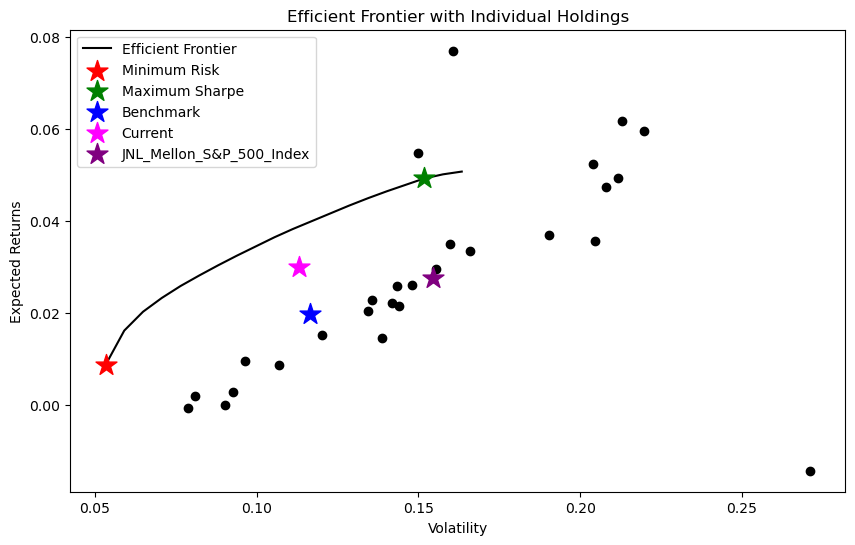

In [22]:
om.plot_efficient_frontier(weightings, results)

In [23]:
print('Optimal Portfolio: ')
results.loc[:, results.loc['Sharpe_Ratio'].idxmax()]

Optimal Portfolio: 


Expected_Return    0.0492
Volatility         0.1518
Sharpe_Ratio       0.1744
Total_Expense%     0.0328
Name: 18, dtype: float64

In [24]:
print(results.to_string())

                      1       2       3       4       5       6       7       8       9      10      11      12      13      14      15      16      17      18      19      20  Benchmark  Current  JNL_Mellon_S&P_500_Index
Expected_Return  0.0086  0.0161  0.0202  0.0232  0.0258  0.0281  0.0303  0.0324  0.0344  0.0364  0.0382  0.0399  0.0416  0.0433  0.0449  0.0464  0.0478  0.0492  0.0501  0.0507     0.0198   0.0299                    0.0276
Volatility       0.0533  0.0591  0.0649  0.0707  0.0765  0.0823  0.0881  0.0939  0.0997  0.1055  0.1112  0.1170  0.1228  0.1286  0.1344  0.1402  0.1460  0.1518  0.1576  0.1634     0.1164   0.1131                    0.1544
Sharpe_Ratio    -0.2644 -0.1114 -0.0387  0.0066  0.0401  0.0653  0.0857  0.1028  0.1173  0.1297  0.1396  0.1474  0.1541  0.1599  0.1650  0.1692  0.1721  0.1744  0.1741  0.1716    -0.0251   0.0637                    0.0317
Total_Expense%   0.0328  0.0324  0.0323  0.0323  0.0323  0.0324  0.0325  0.0325  0.0326  0.0326  0.0326  0.0325 

In [25]:
print(asset_class_exposure.to_string())

                    1       2       3       4       5       6       7       8       9      10      11      12      13      14      15      16      17      18      19      20 Benchmark Current JNL_Mellon_S&P_500_Index
US Stocks      0.3124  0.3714  0.4284  0.4582  0.4839  0.4943  0.5328  0.5763  0.6166  0.6463  0.6833  0.7261  0.7682  0.8203  0.8642  0.8709  0.9557  0.9341   0.919  0.9178    0.6157  0.5049                   0.9805
Non US Stocks  0.0466   0.022  0.0074  0.0077  0.0098  0.0122   0.014  0.0158  0.0179  0.0186  0.0195    0.02  0.0203  0.0211  0.0218   0.021  0.0312  0.0528  0.0689  0.0712    0.1289  0.0127                   0.0108
Bonds          0.5149  0.4867  0.4504   0.426  0.4028  0.3877  0.3489  0.3066  0.2634  0.2364  0.1998  0.1588   0.118   0.067  0.0228  0.0357     0.0     0.0     0.0     0.0    0.2396  0.3411                      0.0
Cash           0.1103  0.1047  0.1029  0.1027  0.1021  0.1044  0.1029  0.0996  0.1005  0.0973  0.0961   0.094  0.0925  0.0912  0.091

In [26]:
portfolio_number = 8
om.display_selected_portfolio(portfolio_number, weightings, results)

Portfolio 8:


YTD Return%    0.0444
Name: 8, dtype: object


TICKER
JNL_WMC_Government_Money_Market              0.1003
JNL_Invesco_Small_Cap_Growth                 0.1003
JNL_T_Rowe_Price_Short_Term_Bond             0.1003
JNL_Mellon_S&P_400_MidCap_Index              0.1003
JNL_Mellon_Small_Cap_Index                   0.1003
JNL_Mellon_Nasdaq_100_Index                  0.1003
JNL_PPM_America_Total_Return                 0.1003
JNL_Newton_Equity_Income                     0.0874
JNL_Mellon_Bond_Index                        0.0610
JNL_Mellon_Consumer_Discretionary_Sector     0.0563
JNL_JPMorgan_US_Government_&_Quality_Bond    0.0373
JNL_Mellon_Financial_Sector                  0.0279
JNL_Mellon_Energy_Sector                     0.0277
Name: 8, dtype: float64


Expected_Return    0.0324
Volatility         0.0939
Sharpe_Ratio       0.1028
Total_Expense%     0.0325
Name: 8, dtype: float64


US Stocks        0.5763
Bonds            0.3066
Cash             0.0996
Non US Stocks    0.0158
Oth

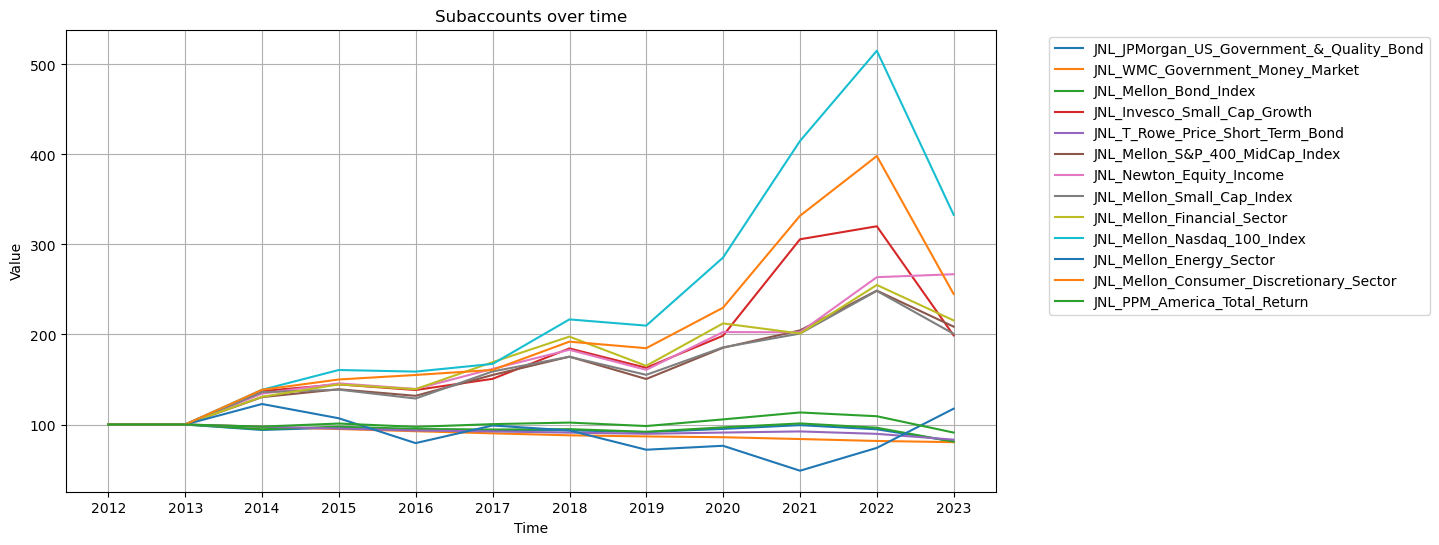

In [27]:
portfolio = weightings[portfolio_number]
om.plot_holdings_values(portfolio[portfolio!=0])

In [28]:
backtest_results = om.run_backtests(weightings)

In [29]:
backtest_timeseries = om.backtest_timeseries(backtest_results)

In [30]:
perf.performance_stats(backtest_timeseries, risk_free_rate, freq=1).sort_values(by='m2_alpha', ascending=False)

,vol,beta,cagr,drawdown,capm,jensen_alpha,m2,m2_alpha,sharpe,treynor,sortino,info_ratio,capture_ratio,appraisal_ratio,ulcer
12-31-2011 - 12-31-2022,,,,,,,,,,,,,,,
Portfolio_JNL_Mellon_S&P_500_Index,0.1649,1.0000,0.0939,-0.2108,0.0939,0.0000,0.0939,0.0000,0.4322,0.0939,1.1547,0.0000,1.0000,0.0000,4.0831
Portfolio_17,0.1930,1.1326,0.0985,-0.2703,0.1034,-0.0049,0.0874,-0.0065,0.3926,0.0870,0.9324,0.1744,0.8845,-0.1002,3.5779
Portfolio_18,0.1942,1.1383,0.0962,-0.2751,0.1038,-0.0076,0.0851,-0.0089,0.3783,0.0845,0.8967,0.1331,0.8563,-0.1532,3.4277
Portfolio_15,0.1847,1.0851,0.0906,-0.2696,0.1000,-0.0094,0.0833,-0.0107,0.3674,0.0835,0.8613,0.0045,0.8342,-0.2049,3.2327
Portfolio_16,0.1880,1.0991,0.0917,-0.2727,0.1010,-0.0093,0.0832,-0.0108,0.3669,0.0834,0.8628,0.0348,0.8347,-0.1869,3.2582
Portfolio_19,0.2009,1.1686,0.0943,-0.2939,0.1060,-0.0117,0.0815,-0.0125,0.3565,0.0807,0.8032,0.1075,0.8204,-0.2049,3.2059
Portfolio_14,0.1786,1.0501,0.0858,-0.2640,0.0975,-0.0117,0.0810,-0.0130,0.3534,0.0817,0.8409,-0.1221,0.8099,-0.2650,3.0674
Portfolio_20,0.2084,1.1964,0.0929,-0.3179,0.1079,-0.0150,0.0783,-0.0157,0.3370,0.0777,0.7058,0.0951,0.7930,-0.2230,3.0095
Portfolio_13,0.1720,1.0112,0.0803,-0.2582,0.0947,-0.0144,0.0779,-0.0160,0.3350,0.0794,0.8168,-0.2833,0.7779,-0.3407,2.8617


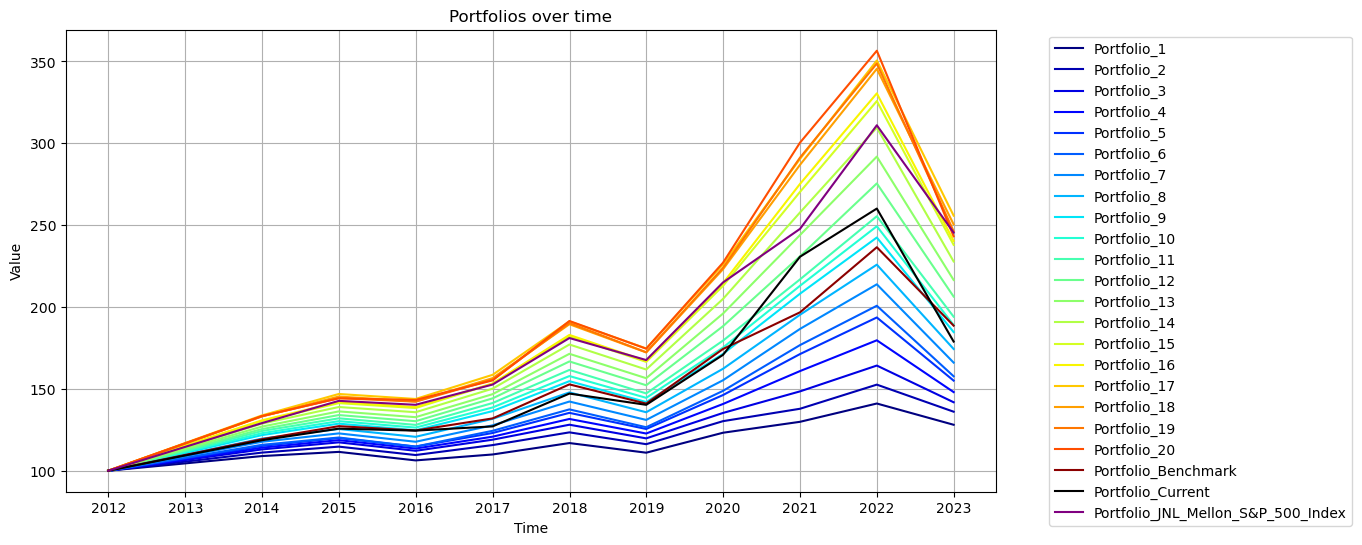

In [31]:
perf.plot_portfolios(backtest_timeseries)

In [32]:
print(weightings.to_string())

                                                    1       2       3       4       5       6       7       8       9      10      11      12      13      14      15      16      17      18     19     20  Benchmark  Current  JNL_Mellon_S&P_500_Index
TICKER                                                                                                                                                                                                                                                   
JNL_JPMorgan_US_Government_&_Quality_Bond      0.1012  0.1000  0.1018  0.1016  0.1000  0.0823  0.0594  0.0373  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.000  0.000     0.0000   0.0000                       0.0
JNL_T_Rowe_Price_Mid_Cap_Growth                0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0216  0.0293  0.0000  0.0000  0.0000  0.000  0.000     0.0000   0.0000                       0.0




JNL_Mellon_S&P_500_Index          0.6267
JNL_Mellon_Bond_Index             0.2493
JNL_Mellon_International_Index    0.1240
Name: Weighting%, dtype: float64


Asset Class
US Stocks        0.6157
Bonds            0.2396
Non US Stocks    0.1289
Cash             0.0156
Other            0.0001
dtype: float64


Sectors
Technology                0.1763
Healthcare                0.1066
Financial Services        0.1011
Consumer Cyclical         0.0779
Industrials               0.0726
Consumer Defensive        0.0580
Communication Services    0.0566
Energy                    0.0350
Basic Materials           0.0246
Utilities                 0.0219
Real Estate               0.0200
dtype: float64


Morningstar Category
Large Blend               0.6267
Intermediate Core Bond    0.2493
Foreign Large Blend       0.1240
Name: Weighting%, dtype: float64




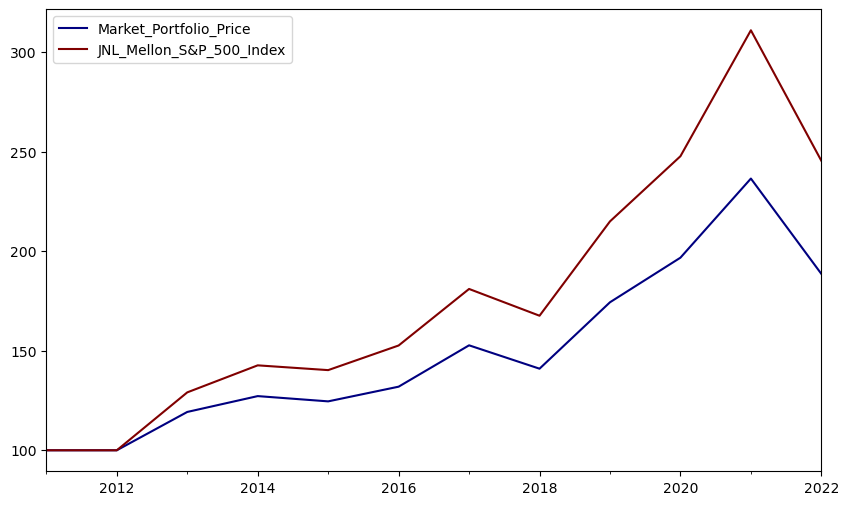

In [33]:
bm.display_benchmark_portfolio()